In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [611]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [612]:
df.shape

(7043, 21)

In [613]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [615]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [616]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [617]:
df.duplicated().sum()

np.int64(0)

In [618]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


<Axes: xlabel='Churn', ylabel='count'>

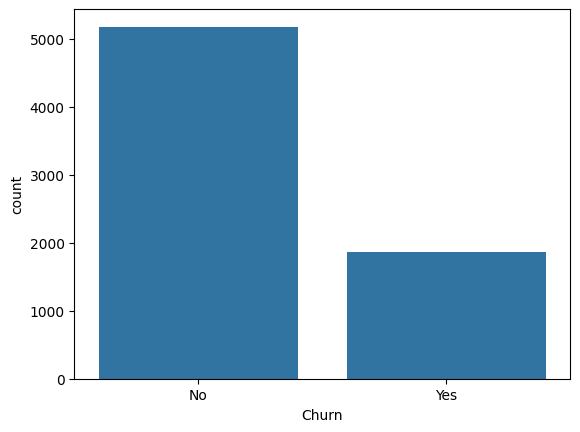

In [619]:
sns.countplot(x="Churn",data=df)

<Axes: xlabel='Contract', ylabel='count'>

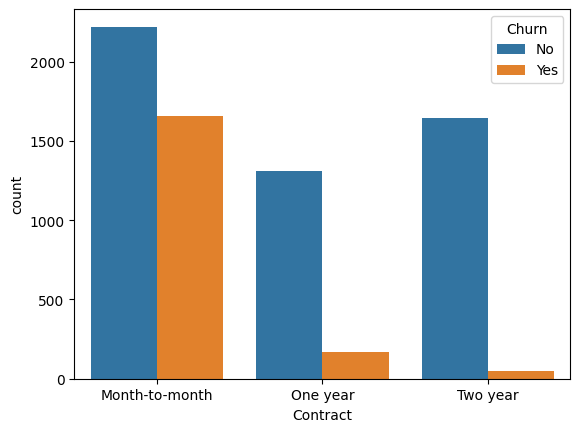

In [620]:
sns.countplot(x="Contract",hue="Churn",data=df)

In [621]:
def tenure_group(t):
    if t <= 12:
        return "New"
    elif t <= 36:
        return "Medium"
    else:
        return "Old"

df["TenureGroup"] = df["tenure"].apply(tenure_group)
df["TenureGroup"] = df["TenureGroup"].map({"New":0, "Medium":1, "Old":2})

In [622]:
df["IsMonthlyContract"] = df["Contract"].apply(lambda x: 1 if x=="Month-to-month" else 0)


In [623]:
service_cols = ["PhoneService", "OnlineSecurity", "OnlineBackup",
                "DeviceProtection", "TechSupport",
                "StreamingTV", "StreamingMovies"]
df["TotalServices"] = df[service_cols].apply(lambda x: sum(x=="Yes"), axis=1)


In [624]:
df["ChargeLevel"] = pd.qcut(df["MonthlyCharges"], q=3, labels=["Low","Medium","High"])
df["ChargeLevel"] = df["ChargeLevel"].map({"Low":0, "Medium":1, "High":2})

In [625]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,IsMonthlyContract,TotalServices,ChargeLevel
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.5,No,1,0,3,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,3,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,2,0,3,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,1,1


In [626]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn", "gender"]
for col in binary_cols:
    df[col] = df[col].map({"Yes":1, "No":0, "Male":1, "Female":0})


In [627]:
multi_cat = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
             "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
             "Contract", "PaymentMethod"]
df = pd.get_dummies(df, columns=multi_cat, drop_first=True)

In [628]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [629]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)

In [630]:
df.drop("customerID", axis=1, inplace=True)

In [631]:
y = df["Churn"]
X= df.drop("Churn", axis=1)


In [632]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "TotalServices", "TenureGroup", "ChargeLevel"]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [633]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [634]:
X_train.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure     PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  TenureGroup  IsMonthlyContract  TotalServices  ChargeLevel  MultipleLines_No phone service  MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
1       0              0        0           -1.277445  1             1                  0.170776       -0.974941     -1.312078    1                  -1.052777       0.000695    False                           False              True                         False               False                               False               False                             False             False                                 False                 False                            False            False                            False            False                                False                False              False              False                                  True                            False                         3
0       0              0        0           -1.277445  1             0                 -1.457785       -0.996559     -1.312078    1                  -1.052777      -1.223702    False                           False              False                        True                True                                False               True                              False             True                                  False                 True                             False            True                             False            True                                 False                False              False              False                                  False                           True                          3
1       0              0        0           -1.277445  1             0                 -1.481050       -0.996868     -1.312078    1                  -1.052777      -1.223702    False                           False              False                        True                True                                False               True                              False             True                                  False                 True                             False            True                             False            True                                 False                False              False              False                                  False                           True                          3
0       0              0        0           -1.277445  1             0                 -1.491021       -0.997000     -1.312078    1                  -1.052777      -1.223702    False                           False              False                        True                True                                False               True                              False             True                                  False                 True                             False            True                             False            True                                 False                False              False              False                                  False                           True                          2
        1              0        0           -1.277445  1             1                  0.160806       -0.975074     -1.312078    1                  -1.052777       0.000695    False                           False              True                         False               False   

In [635]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


In [636]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [637]:

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Churn
0    4138
1    1496
Name: count, dtype: int64
After SMOTE: Churn
0    4138
1    4138
Name: count, dtype: int64


In [638]:
print(X.shape)

(7043, 34)


In [639]:
print(y.shape)

(7043,)


In [640]:
model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1500)

In [641]:
y_pred=model.predict(X_test)

In [642]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8204400283889283


In [643]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[934 102]
 [151 222]]


In [644]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

